In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def EDA(df, show_plots=True):
    # Estad√≠sticas por columna num√©rica
    columnas_num = df.select_dtypes(include=[np.number]).columns
    if len(columnas_num) == 0:
        print("\n No se encontraron columnas num√©ricas.")
    else:
        for col in columnas_num:
            serie = df[col].dropna()
            modos = serie.mode()
            modos_list = modos.tolist() if not modos.empty else []
            print(f"\nüîé Estad√≠sticas para la columna: {col}")
            print(f"  ‚ñ∏ Media: {serie.mean():.4f}" if not serie.empty else "  ‚ñ∏ Media: n/a")
            print(f"  ‚ñ∏ Mediana: {serie.median():.4f}" if not serie.empty else "  ‚ñ∏ Mediana: n/a")
            print(f"  ‚ñ∏ Desviaci√≥n est√°ndar: {serie.std():.4f}" if not serie.empty else "  ‚ñ∏ Desv. est√°ndar: n/a")
            print(f"  ‚ñ∏ M√≠nimo: {serie.min() if not serie.empty else 'n/a'}")
            print(f"  ‚ñ∏ M√°ximo: {serie.max() if not serie.empty else 'n/a'}")
            print(f"  ‚ñ∏ Moda(s): {modos_list if modos_list else 'n/a'}")

    # Visualizaciones
    if show_plots and len(columnas_num) > 0:
        # Boxplots
        for col in columnas_num:
            plt.figure()
            df.boxplot(column=col)
            plt.title(f"Boxplot de {col}")
            plt.tight_layout()
            plt.show()

        # Histogramas
        plt.figure()
        df[columnas_num].hist(figsize=(20, 15))
        plt.tight_layout()
        plt.show()

        # Matriz de correlaci√≥n
        correlaciones = df.corr(numeric_only=True)
        if correlaciones.shape[0] >= 2:
            plt.figure(figsize=(14, 10))
            annot_flag = correlaciones.shape[0] <= 12
            sns.heatmap(correlaciones, cmap="coolwarm", annot=annot_flag, fmt=".2f",
                        linewidths=0.5)
            plt.title(" Matriz de correlaci√≥n entre variables num√©ricas")
            plt.xticks(rotation=45, ha="right")
            plt.yticks(rotation=0)
            plt.tight_layout()
            plt.show()
        else:
            print("\n No se puede calcular una matriz de correlaci√≥n √∫til (muy pocas columnas num√©ricas).")

    



üîé Estad√≠sticas para la columna: apartment_id
  ‚ñ∏ Media: 15119780.9941
  ‚ñ∏ Mediana: 16737061.0000
  ‚ñ∏ Desviaci√≥n est√°ndar: 7715577.7476
  ‚ñ∏ M√≠nimo: 11964
  ‚ñ∏ M√°ximo: 27245117
  ‚ñ∏ Moda(s): [10005342, 10713417, 13966456, 14326808, 14582385, 15402794, 24038577]

üîé Estad√≠sticas para la columna: host_id
  ‚ñ∏ Media: 62186729.4978
  ‚ñ∏ Mediana: 42613804.0000
  ‚ñ∏ Desviaci√≥n est√°ndar: 57470944.5630
  ‚ñ∏ M√≠nimo: 10704
  ‚ñ∏ M√°ximo: 336524176
  ‚ñ∏ Moda(s): [80839530]

üîé Estad√≠sticas para la columna: accommodates
  ‚ñ∏ Media: 4.3518
  ‚ñ∏ Mediana: 4.0000
  ‚ñ∏ Desviaci√≥n est√°ndar: 2.6206
  ‚ñ∏ M√≠nimo: 1
  ‚ñ∏ M√°ximo: 29
  ‚ñ∏ Moda(s): [2]

üîé Estad√≠sticas para la columna: bathrooms
  ‚ñ∏ Media: 1.6071
  ‚ñ∏ Mediana: 1.0000
  ‚ñ∏ Desviaci√≥n est√°ndar: 0.9896
  ‚ñ∏ M√≠nimo: 0.0
  ‚ñ∏ M√°ximo: 12.0
  ‚ñ∏ Moda(s): [1.0]

üîé Estad√≠sticas para la columna: bedrooms
  ‚ñ∏ Media: 1.9682
  ‚ñ∏ Mediana: 2.0000
  ‚ñ∏ Desviaci√≥n est√°ndar: 1.3002
  ‚ñ∏ M√≠nimo:

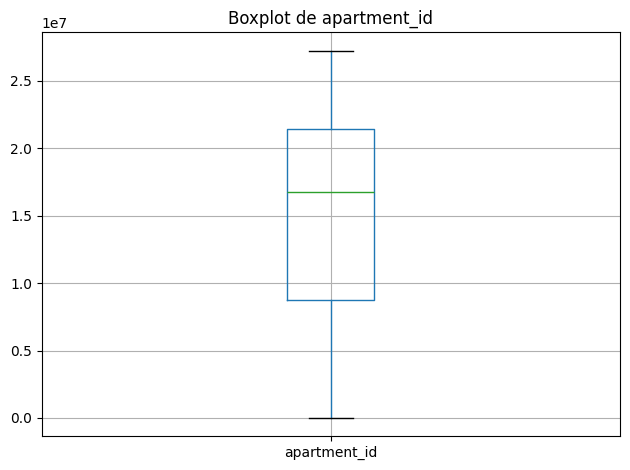

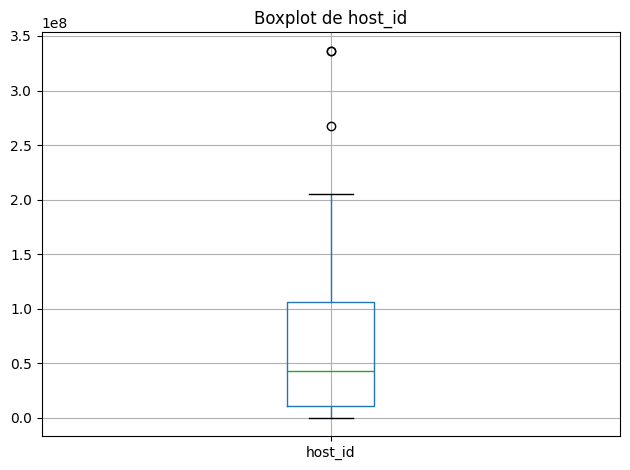

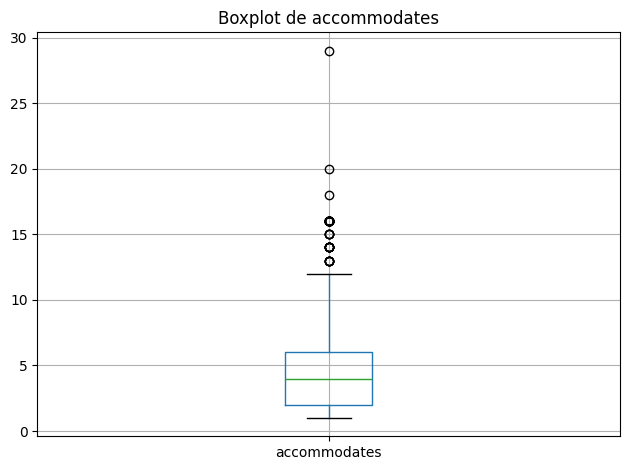

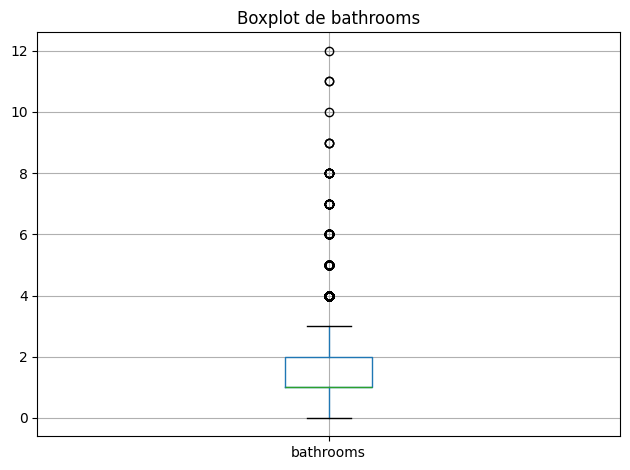

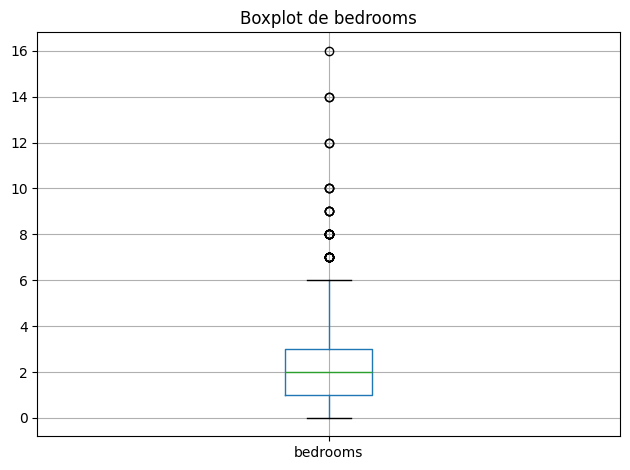

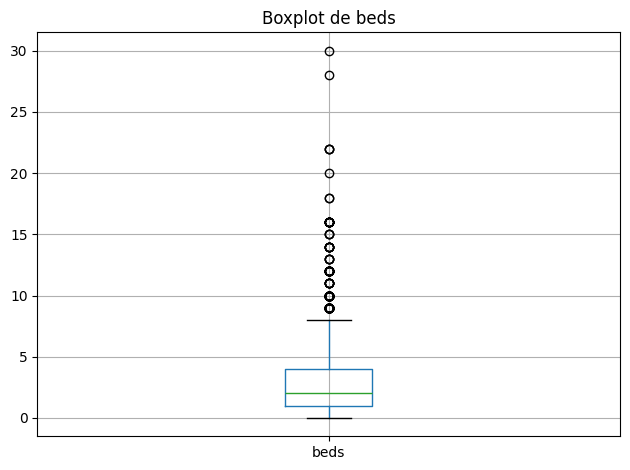

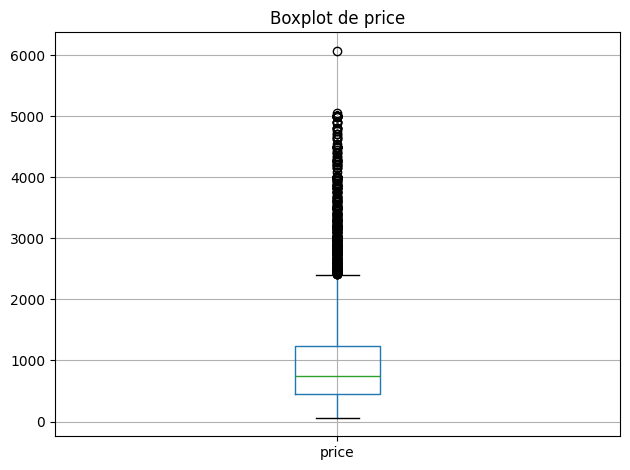

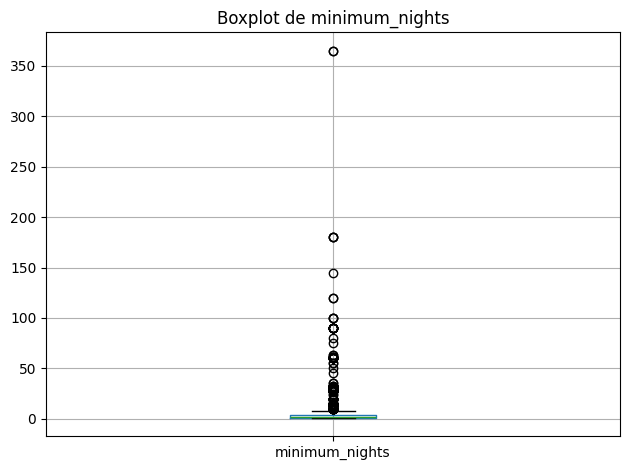

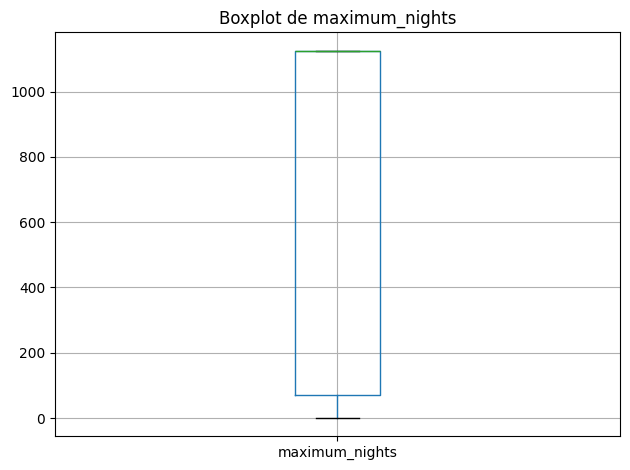

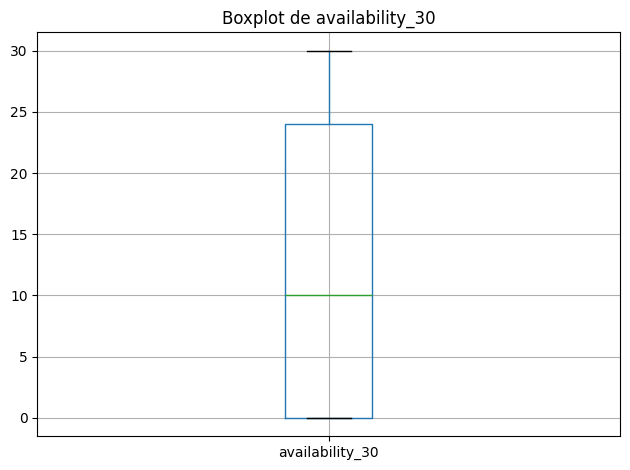

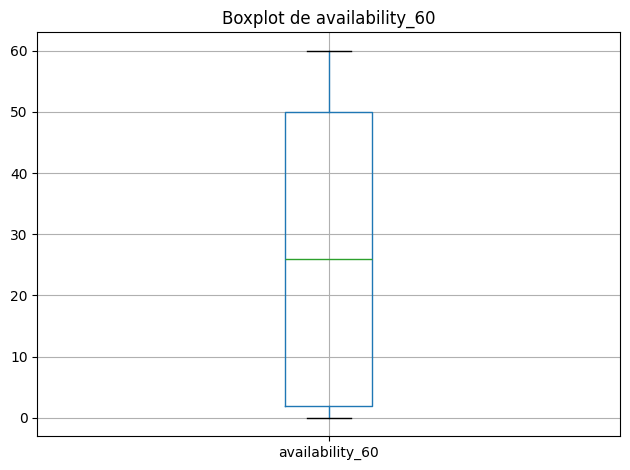

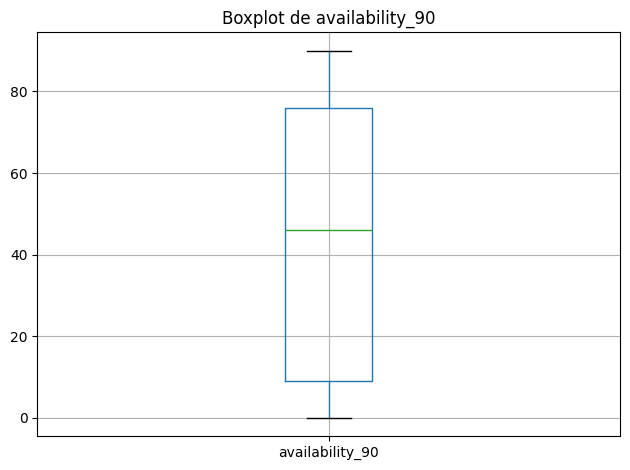

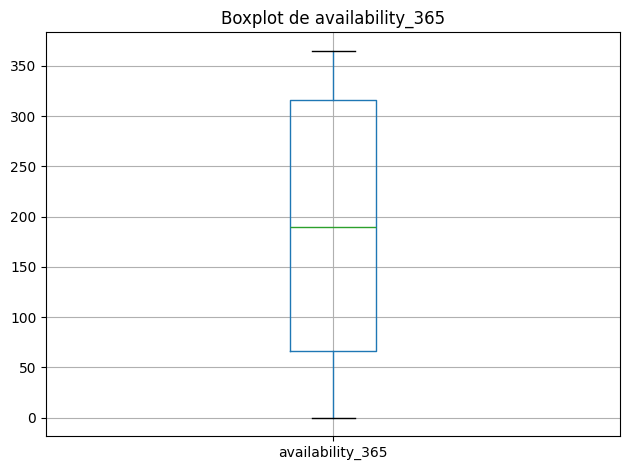

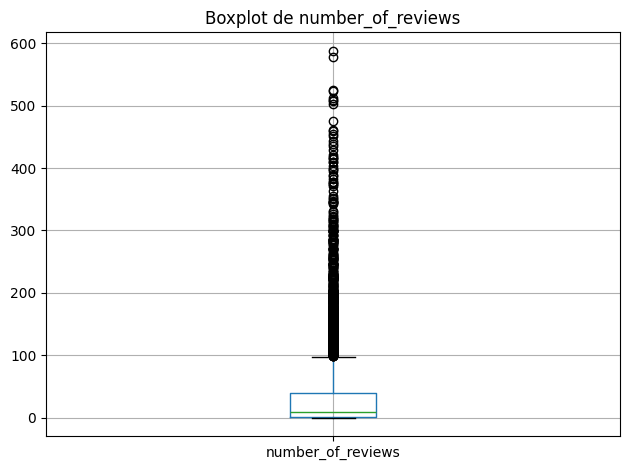

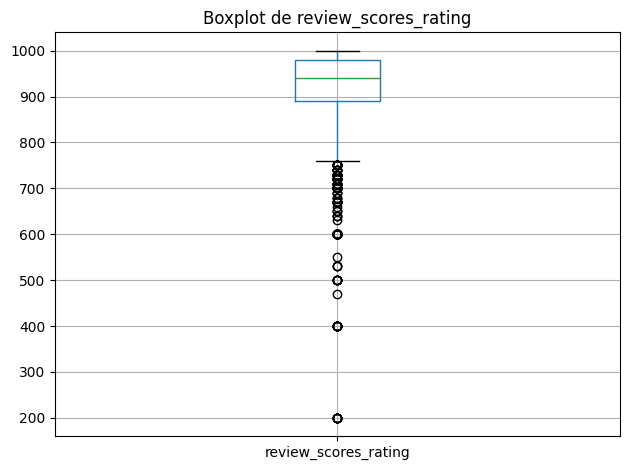

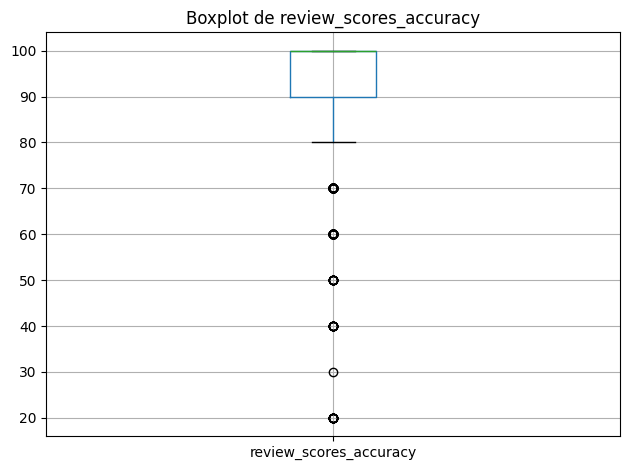

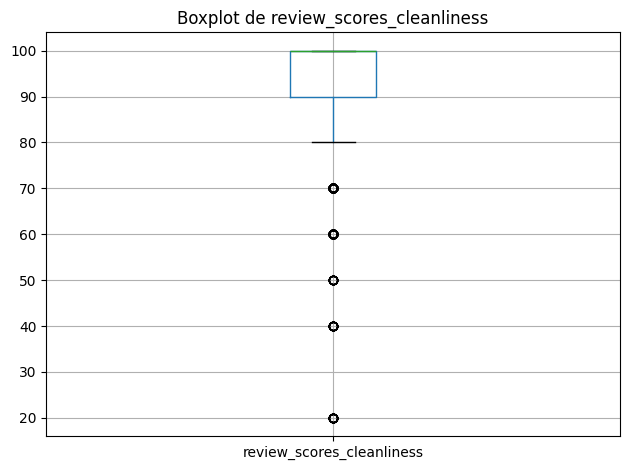

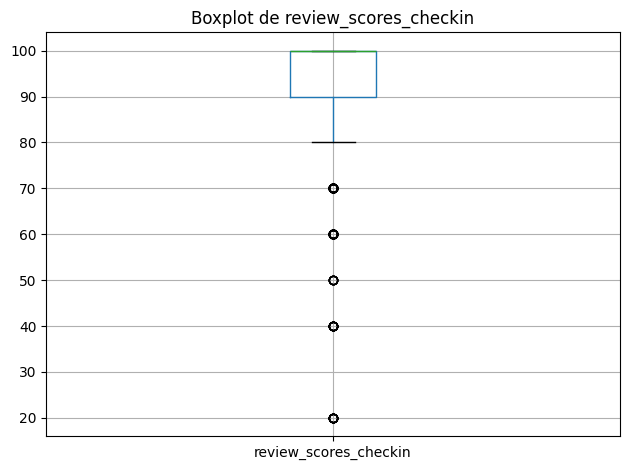

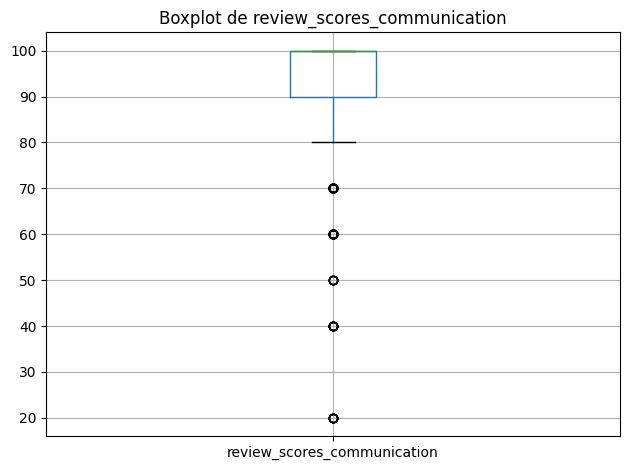

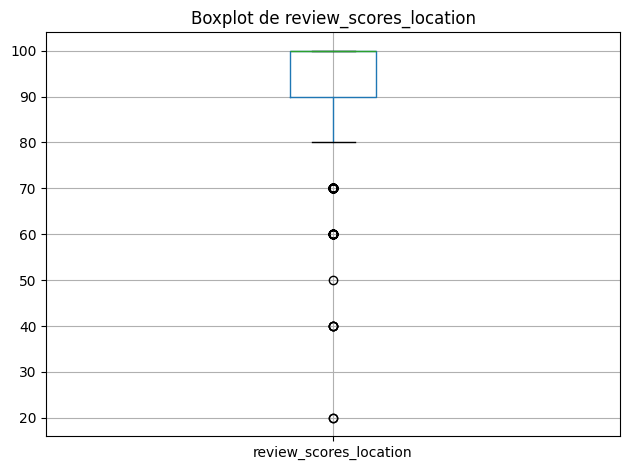

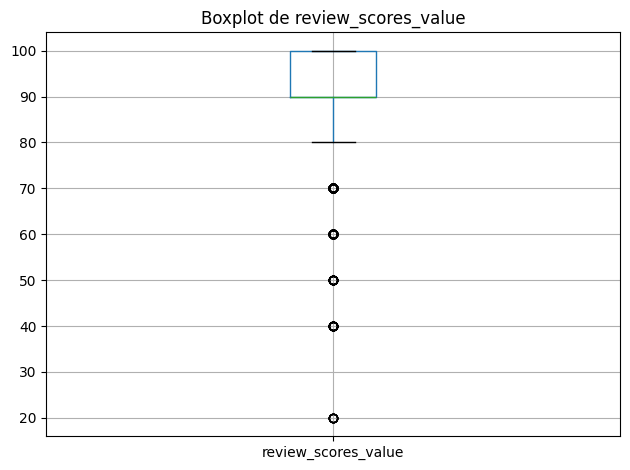

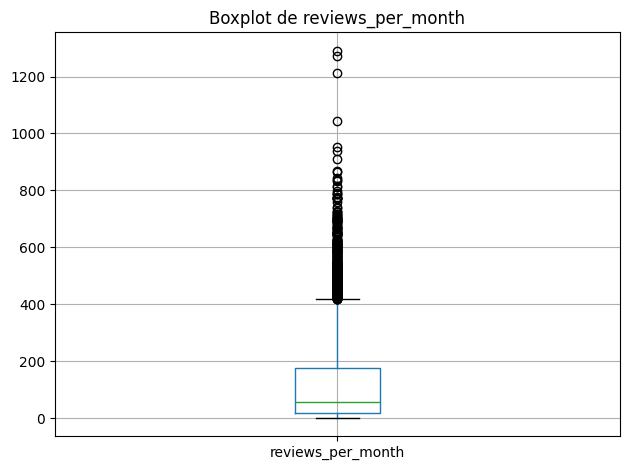

<Figure size 640x480 with 0 Axes>

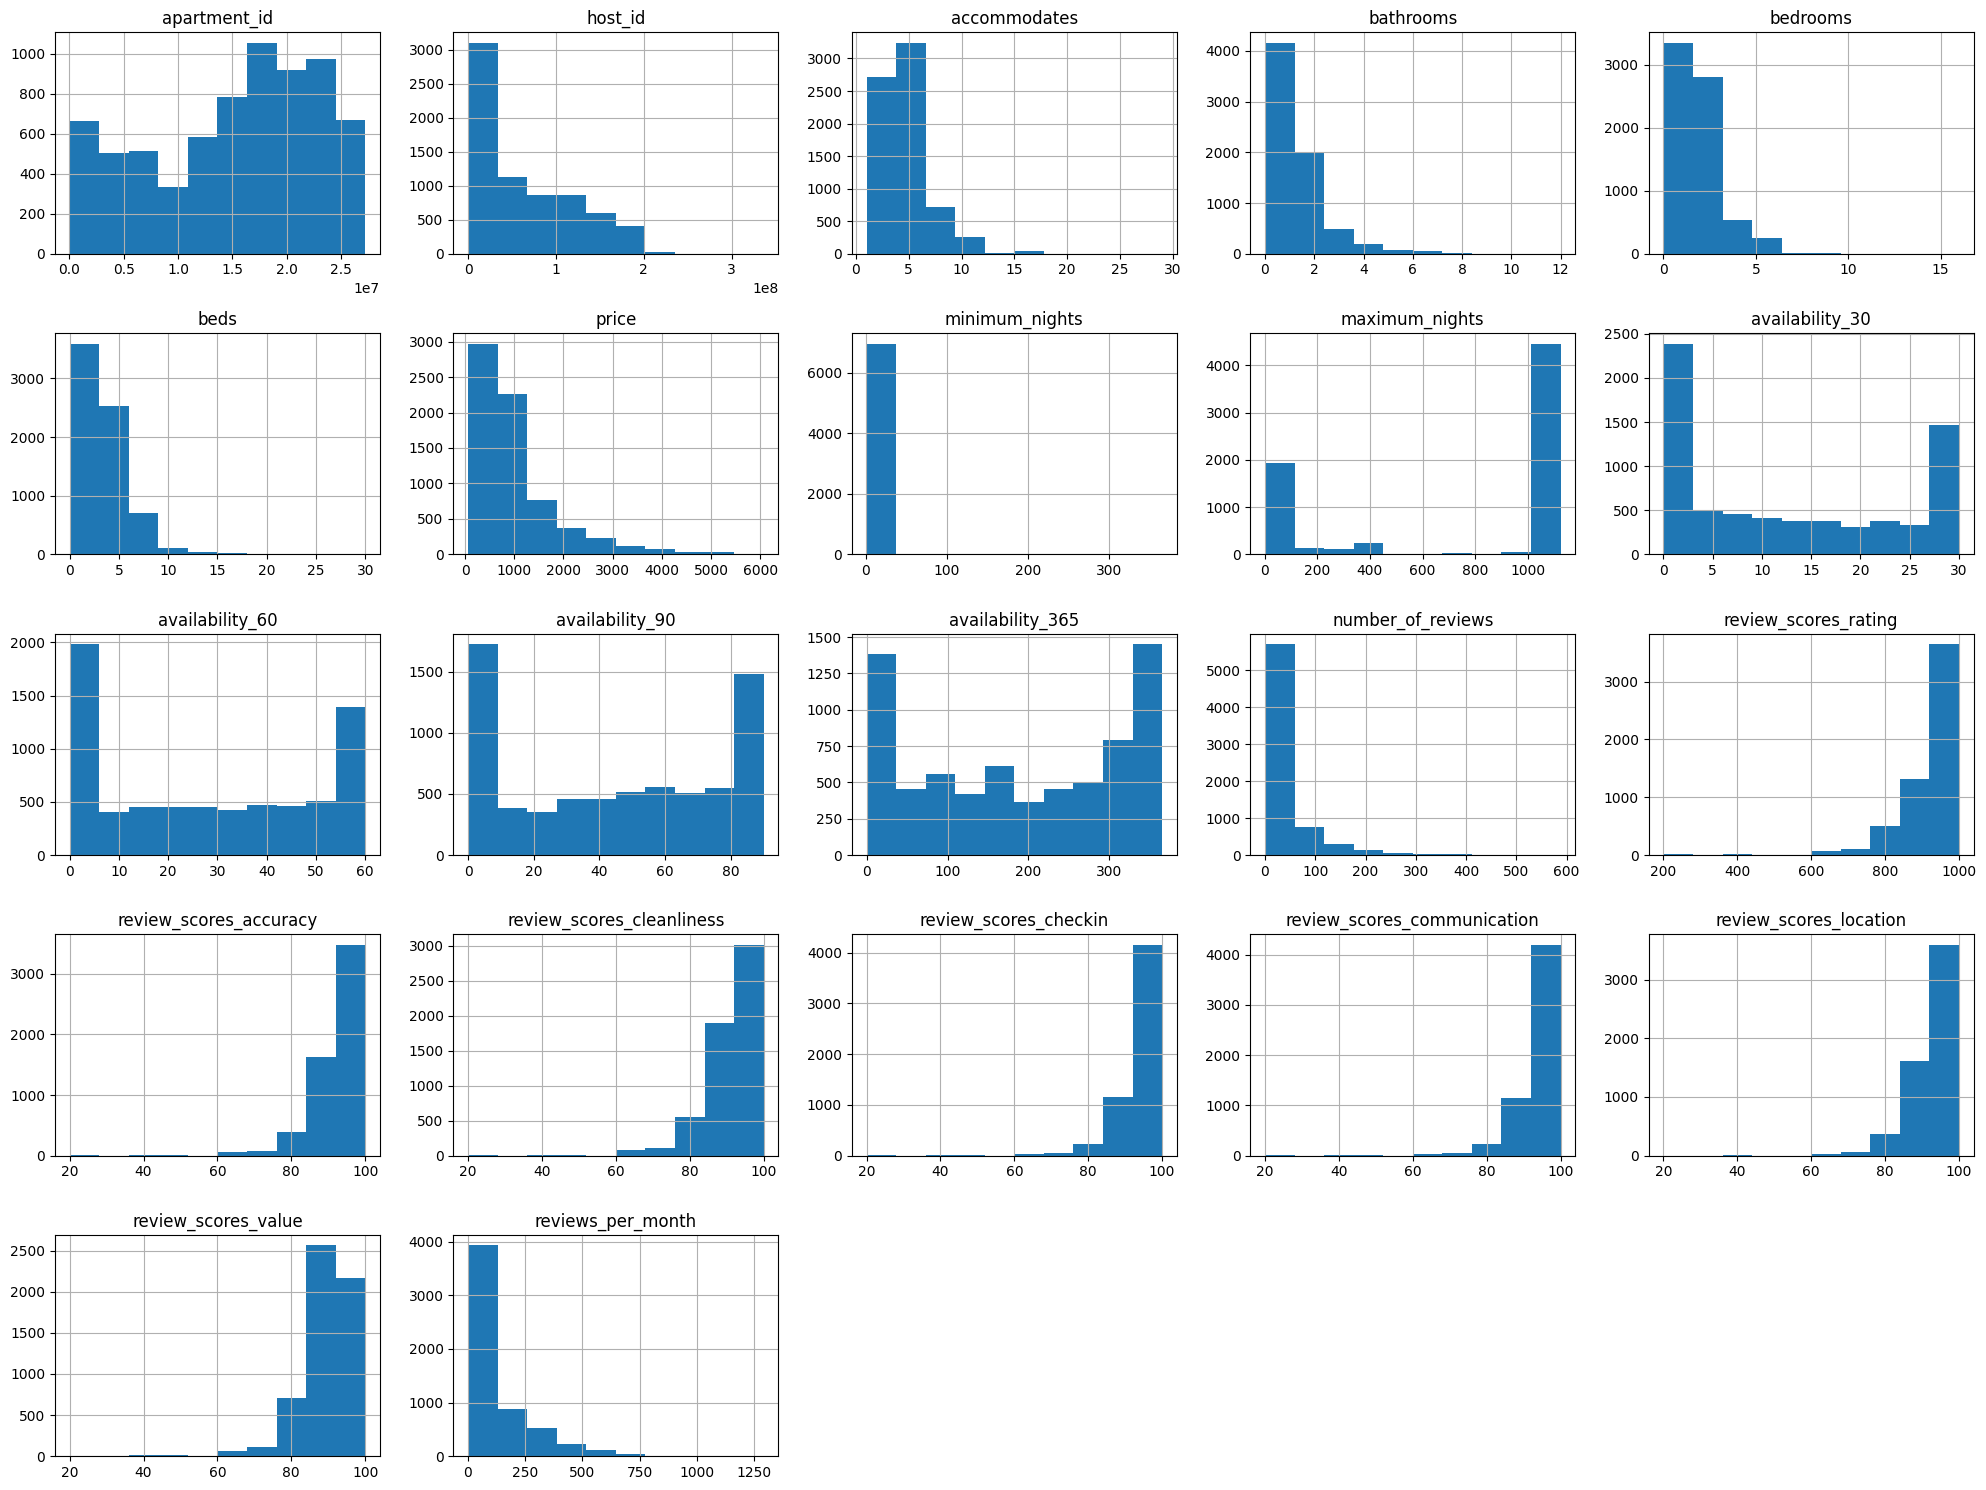

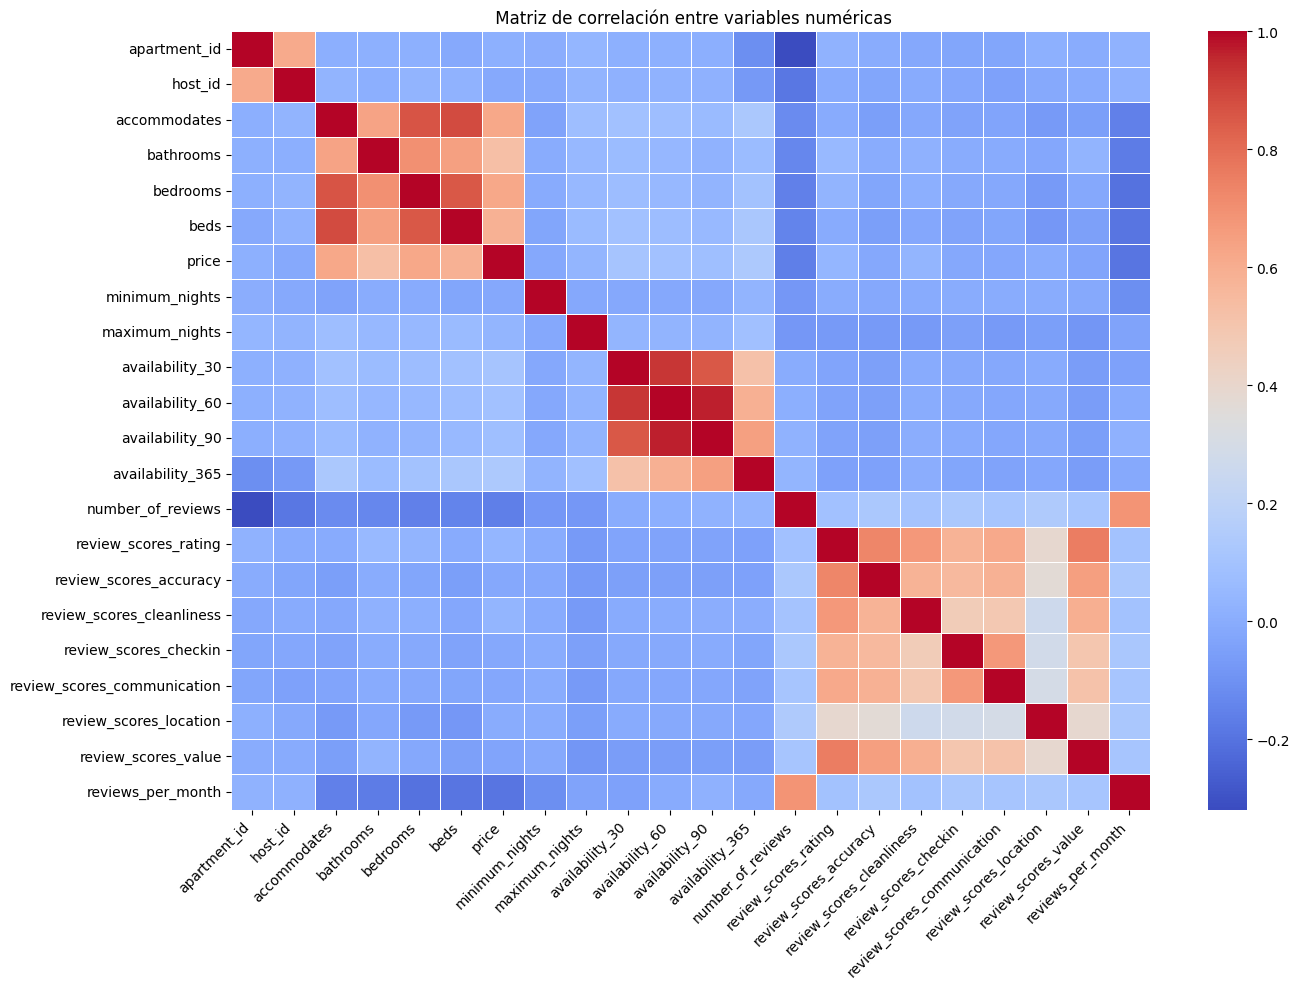

In [8]:
df = pd.read_csv("data/staySpain_raw.csv")
EDA(df)


Informe EDA
1. Informaci√≥n General

Registros totales: 7.001 alojamientos.
Capacidad: Entre 1 y 29 plazas, y entre 0 y 30 camas.
Precio: Promedio de 1.011‚ÄØ‚Ç¨, con un rango de 60‚ÄØ‚Ç¨ a 6.071‚ÄØ‚Ç¨. Alta dispersi√≥n y presencia de outliers.
Los datos muestran gran diversidad en capacidad y precio. Algunos alojamientos presentan precios extremadamente bajos o camas nulas, lo que podr√≠a requerir validaci√≥n o limpieza.

2. Disponibilidad

Disponibilidad limitada en la mayor√≠a de los casos:
Mediana de 10 d√≠as para disponibilidad a 30 d√≠as.
Solo 188 d√≠as promedio de disponibilidad anual (sobre 365).
Sin embargo, existen tambi√©n muchos alojamientos con alta disponibilidad (100%).
Hay dos perfiles claros: alojamientos con disponibilidad casi total todo el a√±o y otros con disponibilidad m√≠nima. Este dato es clave para segmentar.

3. Estancia M√≠nima y M√°xima

Noches m√≠nimas requeridas: Entre 1 y 365.
Mediana: 2 noches.
La mayor√≠a de alojamientos exigen estancias cortas, aunque existen outliers (probablemente errores o casos especiales).

4. Rese√±as y Puntuaciones

Puntuaci√≥n media general: 91.46 sobre 100.
Puntuaciones espec√≠ficas muy altas:
Comunicaci√≥n: 96.43
Check-in: 96.29
Ubicaci√≥n: 95.31
Media de rese√±as por alojamiento: 34
Rese√±as por mes: Promedio de 123, con gran variabilidad.
Alta satisfacci√≥n del cliente en general. Las puntuaciones est√°n fuertemente concentradas en rangos altos (80‚Äì100), lo que sugiere una experiencia muy positiva percibida.

5. Distribuciones y Outliers

Sesgos positivos en muchas variables (distribuci√≥n sesgada a la derecha): price, minimum_nights, reviews_per_month, etc.
M√∫ltiples outliers identificados en casi todas las variables num√©ricas.
Variables como apartment_id y host_id distorsionan los gr√°ficos y no aportan valor anal√≠tico ‚Üí recomendado excluirlas.
Normalizar o transformar variables altamente sesgadas. Aplicar tratamiento de outliers si se desea un an√°lisis m√°s robusto.

6. Matriz de Correlaci√≥n ‚Äì Relaciones destacadas

Correlaciones fuertes (positivas):

accommodates ‚Üî beds: 0.88: Plazas y camas est√°n fuertemente relacionadas.
availability_30 ‚Üî 60 ‚Üî 90: entre 0.93 y 0.96 ‚Üí Las disponibilidades en diferentes ventanas temporales son coherentes.
review_scores_* variables: todas correlacionan entre 0.67 y 0.76, Las buenas puntuaciones tienden a venir juntas.
number_of_reviews ‚Üî reviews_per_month: 0.69

Correlaciones d√©biles o irrelevantes:

minimum_nights no se correlaciona con otras variables.
price tiene una relaci√≥n moderada con accommodates (0.62) y beds (0.58).
apartment_id, host_id no aportan valor predictivo.

7. Conclusiones 

Alta calidad percibida: Las puntuaciones son muy buenas y coherentes entre s√≠, se podr√≠an resumir en un solo √≠ndice de satisfacci√≥n.
Disponibilidad dual: Segmentar entre alojamientos siempre disponibles vs. de disponibilidad limitada puede ser √∫til para an√°lisis o predicci√≥n.
Precios y estancias muy variables: Requiere revisi√≥n y posible tratamiento de outliers y normalizaci√≥n para an√°lisis m√°s robusto.
Variables no informativas: Eliminar apartment_id y host_id para evitar distorsiones en gr√°ficos y modelos.
Correlaciones claras: Algunas variables muestran alta redundancia (por ejemplo, puntuaciones o disponibilidades) posibles candidatos para reducci√≥n de dimensiones.